# Three interpretations of logistic regression
1. Geometric
2. Probabilistic
3. Loss function

In [1]:
from IPython.display import YouTubeVideo as YT
from IPython.display import Image

# 1. Probability interpretation

Logistic Regression even though being a regression technique is used with a qualitative response (binary response specifically) instead of a quantitative one. Such as something is True or False. Instead of fitting a line to a data, it fits an S shaped logistic function. The curve goes from 0 to 1 and that means the curve tells you the <b>probability</b> that something is True or False. Hence the name regression in it. Since this model tells a probabilty of a possibility of something, it is usually used for classification problems. Logistic regression can work with continous and discrete/categorical variables as well.

For example if we're predicting whether a mouse i obese or not based on its weight, its probability can be written as :

$$ Pr(obese=True | weight) $$

The probability of a mouse being obese or not, given its weight has to always be $\epsilon$ [0,1]. We can select a threshold say if Pr>0.5, then the mouse is obese, otherwise not.

#### Wald's Test
It helps us know which variables help in explaining the variance in response variable in the case of Logistic Regression. It's a test to see if a variable's effect on the response is significantly different than 0.

#### Logistic vs Linear Regression
One difference is how the line is fit to the data. Linear regression uses Orindary Least Squares method (OLS) that minimizes the sum of the squares of the residuals. However, in logistic regression there is no concept of residuals or $R^2$. Logistic Regression uses maximum likelihood. We'll face the following problems if run a simple linear regression on a dataset that has a binary response variable :

1. The dependent binary variable in logistic regression follows the bernoulli distribution, and not a normal distribution, which is a condition needed for most regression models.
2. The predicted probabilities of the response variable by a linear/non-linear regression model, might be <0 or >1 which makes no sense.
3. Probabilities are often not linear such as 'U' shapes where the probabilities are very low or very high at extreme values of X.

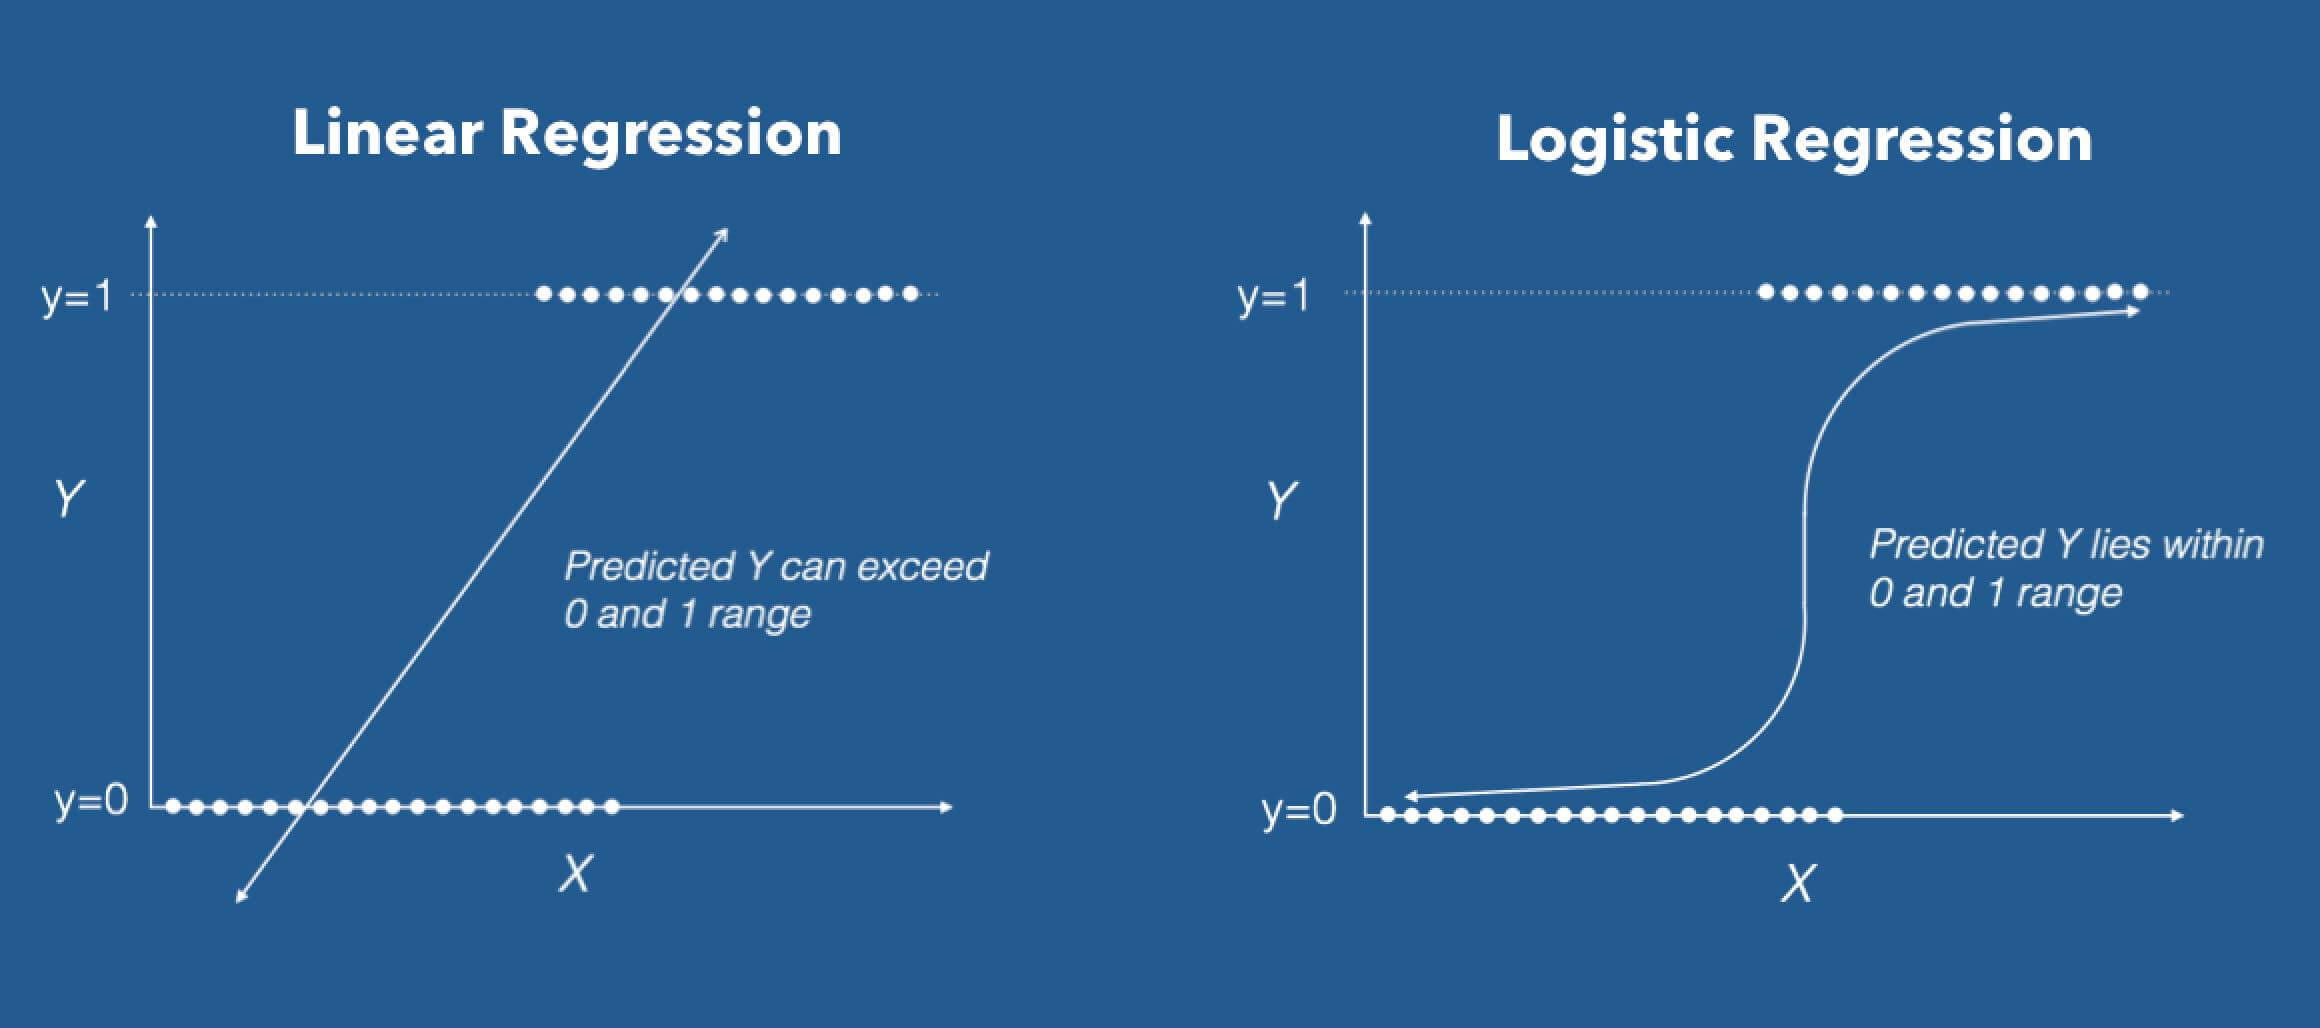

In [10]:
Image('linear_vs_logistic_regression.jpg', width=900, embed=True)

Since this model predicts the probabiltity of the response variable, we must model Y(X) using a function that gives outputs between 0 & 1 for all values of X. 
Many functions meet this description, but in logistic regression, we use the logistic function:

<font size='4'>$$ P(x) = \frac{e^{<w_i.x_i> + \beta_0}}{1 + e^{<w_i.x_i> + \beta_0}} $$ </font>

The above model is fitted using maximum likelihood

This is also the sigmoid function which has an _S_ shape

with a little manipulation:
$$\frac{P(x)}{1-P(x)} = e^{<w_i.x_i> +\beta_0}  $$

$$ \log \Big[\frac{P(x)}{1-P(x)} \Big] = <w_i.x_i> +\beta_0$$

The L.H.S is called the <b> _logit function_ </b> or the <b>log of odds</b>. 
Odds are nothing but the probability of an event happening v/s the probability of that event not happening i.e :

$$ odds = \frac{\mathcal{P}(X)}{\mathcal{P}(\bar{X})} $$

$$OR$$

$$ odds = \frac{\mathcal{P}(X)}{1 - \mathcal{P}(X)} $$

And the odds ratio is just the ratio of the odds of 2 events such as the odds of getting a head on a fair coin v/s the odds of getting a heads on a rigged coin. The odds ratio for a variable in logistic regression represents how the odds change with a 1 unit increase in that variable holding all other variables constant.

It is important to understand/realize that odds and probability are 2 different things. For example, It is possible that the odds can be very high, but at the same time, the probability for that very event might be low. 

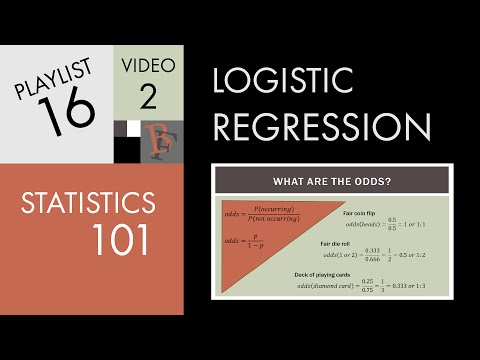

In [11]:
YT('ckkiG-SDuV8', width=800, height=500, start=113)

The logistic function is limited to (0,1). The importance of _logit_ function can be stressed by 2 reasons:

1. Calculating the equation of a bounded function/line is much more difficult to do so than an unbounded function. For eg: In simple linear regression, we calulcate the equation of the line with no bounds i.e the line can take on values from ($-\infty$, $\infty$) (Although it won't make sense beyond a certain point).Similarly by transforming the logistic function into _logit_ we extend its limit from (0,1) to ($-\infty$, $\infty$) so that it's easier to calcualte. 


2. Even though the 'S' shaped graph is what we associate with the logistic regression, The coefficients are represented in terms of the _logit_ function. We also see that the logistic regression model has a logit that is linear in X.

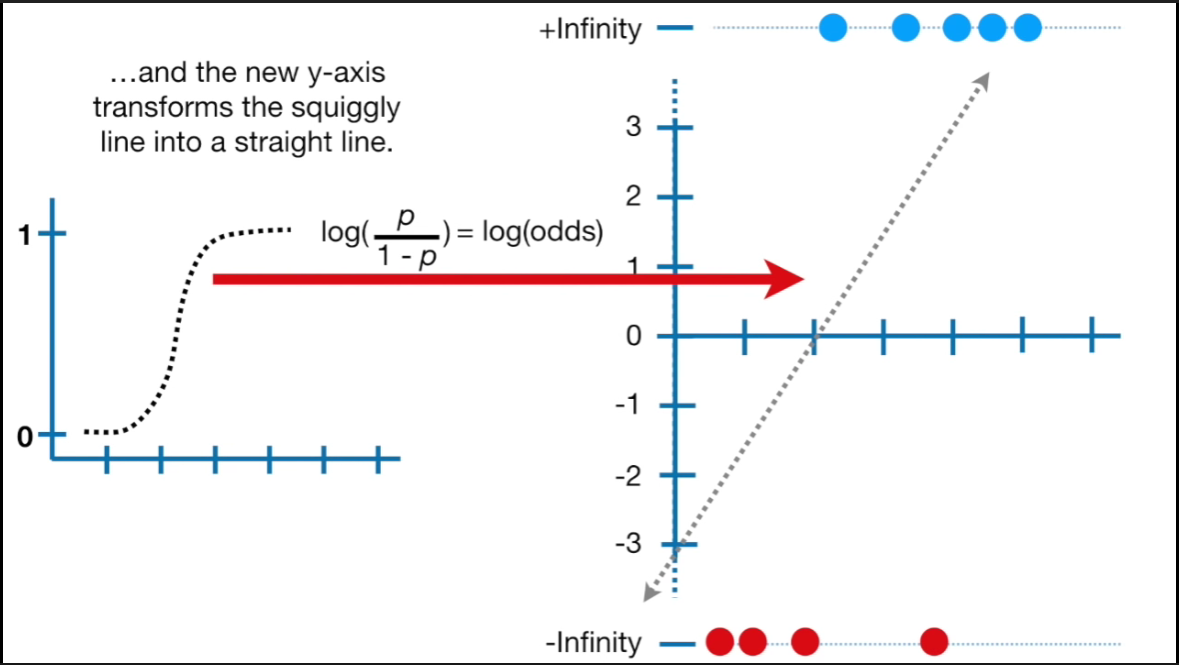

In [5]:
Image('CAPTURE.PNG',width=900, embed=True)
# The left side of the image is the graph of the logistic function and the right side is the graph of the logit function.
# NOTE : This is under the assumption that our data only has 1 feature. Hence the visualization is possible in 2D. And we 
# indeed see that the logit function is linear in X.

The coefficients of the above (right) line is what you get when you do logistic regression.
In the above case, after training the model, we will indeed see that the coeffecients would be 1.5 & -3 representing the slope and intercept, respectively..

We need to find out the parameter vector $w_i$ and $\beta_0$ using maximum likelihood such that the when these estimates are plugged into the model for $P(x)$, yields a number close to 1 for each observation whose response is 1/True and a number 0 for all the observations whose response in 0/False

In [11]:
# DOUBT : I get that P(x) predicts values between 0 & 1, but that doesn't mean it's giving us the probabilities of anything.
# Probability is a different concept of which the most basic definition I can think of is :
#"No. of favourable outcomes / Total No. of outcomes". P(x) doesn't look anything like that. ???!!! 

In [1]:
# GOOD RECOMMENDATION PLAYLIST FOR LOGISTIC REGRESSION :
# 1. StatQuest
# 2. Brandon Foltz
# 3. RitvikMath (for the math part)

## Maximum Likelihood
The goal of maximum likelihood is to find the probability distribution and parameters that best explain the observed data.
The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.

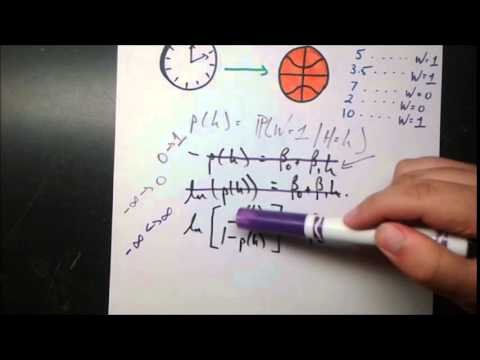

In [13]:
# How logistic regression works and the role of maximum likelihood in it
YT('9zw76PT3tzs', height=500, width=800)

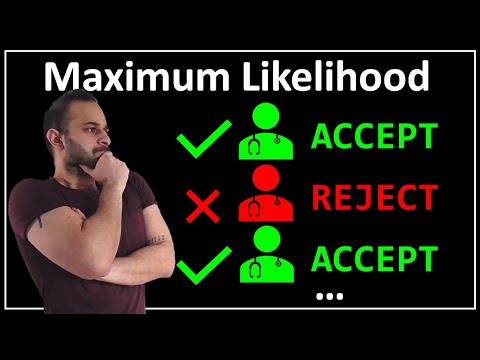

In [3]:
# Diving a little deeper into maximum likelihood
YT('VOIhswqFWVc', width=800, height=500)

### Math intution for Maximum Likelihood

Suppose we have data with n observations and p features i.e (nxp) and the response/target variable is (nx1)

We have a function that outputs values between 0 & 1 that indicates the probability of the response vairiable :

<font size='5'>$$ \mathbb{P}(X) = \frac{e^{\beta_0 +\beta_1x_1 + \beta_2x_2 + ...... + \beta_px_p}}{1 + e^{\beta_0 +\beta_1x_1 + \beta_2x_2 + ...... + \beta_p x_p}} $$ </font>

$$OR$$

<font size='5'>    
$$ \mathbb{P}(X) = \frac{e^{<w_i.x_i>+\beta_0}}{1 + e^{<w_i.x_i>+\beta_0}} $$
</font>

<font size='3'> where $\mathbb{P}(X)$ is the probability of the target variable for each obseravation, being 1 / True, given $X_i$ and $\beta$ and can be written as :
    
$$\mathbb{P}(Y_i | X_i, \beta)$$

With a little bit of algebric manipulation:

<font size='3'>$$ \frac{\mathbb{P}(X)}{1 - \mathbb{P}(X)} = e^{<w_i.x_i> + \beta_0} $$</font>

The L.H.S quantity is known as the _odds_ and can range from (0,$\infty$). Value of _odds_ close to 0 and $\infty$ indicate very low and high probabilties of the response variable, respectively.

By taking log on both side, we get the logit function:
    
$$log \Big[ \frac{\mathbb{P}(X)}{1 - \mathbb{P}(X)} \Big] = <w_i.x_i> +\beta_0$$

$$OR$$

$$log \Big[ \frac{\mathbb{P}(X)}{1 - \mathbb{P}(X)} \Big] = \beta_0 +\beta_1x_1 + \beta_2x_2 + ...... + \beta_px_p$$

In contrast to Linear regression, increasing $x_i$ by one unit changes the _logit_ by $\beta_i$, or equivalently, it multiplies the _odds_ by <font size='4'>$e^{\beta_i}$</font>. Since the relationship between $\mathbb{P}(X)$ and $X$ is not linear, $\beta_i$ does not correspond to the change in $\mathbb{P}(X)$ associated with a one-unit increase in $X$. The type of relationship (+ive or -ive) between $\mathbb{P}(X)$ and $X_i$ will depend on the sign of $\beta_i$.

The above _logit_ function can be abbrieviated in matrix form as :
$$logit(\mathbb{P}) = \beta  X^T_i$$

where $\beta.shape$ = (1 x (p+1)) since it includes $\beta_0$ as well

$\beta$ = [$\beta_0, \beta_1, \beta_2, \beta_3, ............., \beta_p$]

and $X^T.shape$ = ((p+1) x n) since it includes the first row of 1's to accomodate for $\beta_0$

\begin{bmatrix}
1 & 1 & 1 \dots \dots 1\\
x_{11} & x_{12} & x_{13} \dots\dots x_{1n}\\
x_{21} & x_{22} & x_{23} \dots\dots x_{2n}\\
x_{31} & x_{32} & x_{33} \dots\dots x_{3n}\\
\vdots & \ddots & \vdots\\
\vdots & \ddots & \vdots \\
x_{p1} & x_{p2} & x_{p3} \dots\dots x_{pn}
\end{bmatrix}

Now since, we've transposed $X$, each column, and not row, represents one observation. 

For eg : column 1 = $x_1$, column 2 = $x_2$

In order to estimate $\beta$ using maximum likelihood, we can generalize the logistic function for both True and False prediction. 
<font size='3'>
$$ \mathbb{P}(X) = \frac{e^{\beta X^T_i}}{1 + e^{\beta X^T_i}} $$


This gives the probabilty of $X_i$ being True. 

Now for the probability of $X_i$ being False / 0 will just be:

$$\mathbb{P}(\bar{X}) = 1 - \mathbb{P}(X)$$ </font>

<font size='4'>$$ \mathbb{P}(\bar{X}) = 1 - \frac{e^{\beta X^T_i}}{1 + e^{\beta X^T_i}} $$

$$ \mathbb{P}(\bar{X}) = \frac{1}{1 + e^{\beta X^T_i}} $$ </font>

We can generalize the above logistic function by adding the $y_i$ as follows:

<font size='4'> 
    \begin{equation}
    \mathbb{P}(X') = \frac{e^{y_i \beta X^T_i}}{1 + e^{\beta X^T_i}} =
        \begin{cases}
         1 & \text{if $y_i = 1$, $\mathbb{P}(X')$ takes the form of $\mathbb{P}(X)$}\\
         2 & \text{if $y_i = 0$, $\mathbb{P}(X')$ takes the form of $\mathbb{P}(\bar{X})$}
        \end{cases}
    \end{equation}</font>

The above equations are for any 1 observation, for extending this to all the observations, we use the Likelihood Function

### Likelihood Function
It can be understood as the probability of correctly observing/predicting all the actual $y_i$ as we see them in the training data. Or the probability of the predictions correctly matching up with the actual $y_i$.

The likelihood function is given by:

<font size='5'> $$ \mathcal{L}(Y|X,\beta) = \mathbb{P}[(y_1|x_1\beta) \cap (y_2|x_2\beta) \cap (y_1|x_1\beta) \cap ......... \cap (y_n|x_n\beta)] $$ </font>

i.e the probability of getting the 1st, 2nd, 3rd ......nth observation correct as we see in the training data.

Now we make an assumption that these observations are mutually independent of each other.

And hence, because of mutually independent events/observations, the probability of all of these observations being correctly predicted is equal to the product of probability of each of the independent observation i.e:

<font size='5'> $$ \mathcal{L}(Y|X,\beta) = \mathbb{P}(y_1|x_1\beta) * \mathbb{P}(y_2|x_2\beta) * \mathbb{P}(y_3|x_3\beta) * .......... * \mathbb{P}(y_n|x_n\beta) $$ </font>

We'd like to maximize the likelihood function since it gives the probability of correctly predicting <b>$y_i$</b>.

<b> Taking log on both sides for computational reasons since R.H.S will $\to$ 0 real fast since each $\mathbb{P}(y_i|x_i\beta) < 1$.</b>
 And since <b>$\log$</b> maintains the scale of things, maximizing a function is the same as maximizing the <b>$\log$</b> of function.

<font size='5'> $$ \log \Big[\mathcal{L}(Y|X,\beta) \Big] = \log \Big[\mathbb{P}(y_1|x_1\beta) * \mathbb{P}(y_2|x_2\beta) * \mathbb{P}(y_3|x_3\beta) * .......... * \mathbb{P}(y_n|x_n\beta) \Big] $$ </font>

<b>Using logarithmic properties :</b>

<font size='5'>$$ \Longrightarrow \log[\mathbb{P}(y_1|x_1\beta)] + \log[\mathbb{P}(y_2|x_2\beta)] + \log[\mathbb{P}(y_3|x_3\beta)] + ........ + \log[\mathbb{P}(y_n|x_n\beta)]$$</font>

<font size='4'> $$ \Longrightarrow \log \big(\mathcal{L} \big) = \sum_{i=0}^{n} \log \big[ \mathbb{P}(y_i|x_i\beta) \big] $$

<font size='4'> $$ \Longrightarrow \log \big(\mathcal{L} \big) = \sum_{i=0}^{n} \log \Big[ \frac{e^{y_i \beta X^T_i}}{1 + e^{\beta X^T_i}} \Big] $$

<font size='4'> $$ \Longrightarrow \log \big(\mathcal{L} \big) = \sum_{i=0}^{n} \Big[ \log(e^{y_i \beta X^T_i}) - \log(1+e^{\beta X^T_i}) \Big] $$

<font size='4'> $$ \Longrightarrow \log \big(\mathcal{L} \big) = \sum_{i=0}^{n} \Big[ \log(e^{y_i \beta X^T_i}) \Big] - \sum_{i=0}^{n} \Big[ \log(1+e^{\beta X^T_i}) \Big] $$

<font size='4'> $$ \Longrightarrow \log \big(\mathcal{L} \big) = \sum_{i=0}^{n} \Big[ y_i \beta X^T_i \Big] - \sum_{i=0}^{n} \Big[ \log(1+e^{\beta X^T_i}) \Big] $$

<font size='4'>Now we can take the partial derivative of $\log (\mathcal{L})$ with respect to $\beta$ and equate it to 0 (i.e make the slope 0) and solve for $\beta$ in order to estimate the $\beta$ for which $\log(\mathcal{L})$ is maximum.</font>

<font size='4'>$$ \frac{\partial \log(\mathcal{L})}{\partial \beta} = \frac{\partial \Big[ \sum_{i=0}^{n} \big[ y_i \beta X^T_i \big] - \sum_{i=0}^{n} \big[ \log(1+e^{\beta X^T_i}) \big] \Big]}{\partial \beta} $$</font>

<font size='4'>$$ \Longrightarrow \frac{\partial \log(\mathcal{L})}{\partial \beta} = \sum_{i=0}^{n} y_i X^T_i - \sum_{i=0}^{n} \Big(X^T_i \frac{ e^{\beta X^T_i}}{1 + e^{\beta X^T_i}} \Big) $$</font>

<font size='4'>$$ \Longrightarrow \frac{\partial \log(\mathcal{L})}{\partial \beta} = \sum_{i=0}^{n} y_i X^T_i - \sum_{i=0}^{n} \Big( X^T_i \sigma(X^T_i, \beta) \Big) $$</font>

<font size='3'>where: $$\sigma(X^T_i, \beta) = \mathbb{P}(X) = \frac{e^{\beta X^T_i}}{1 + e^{\beta X^T_i}} $$ </font>

<font size='4'>$$ \Longrightarrow \frac{\partial \log(\mathcal{L})}{\partial \beta} = X^T_i \sum_{i=0}^{n} \big[ y_i - \sigma(X^T_i, \beta) \big] $$</font>

<font size='5' color='ForestGreen'> $$ \frac{\partial \log(\mathcal{L})}{\partial \beta} = X^T \big[ Y - \sigma(X^T, \beta) \big] $$ </font>

<font size='4'> Even though we do not have $\beta$ in an independent form, currently it's trapped inside the function $\sigma$, we can equate the above equation to 0 and solve for $\beta$ with a little bit of mathematics to find the global maxima of $\log(\mathcal{L})$. We can find the global maxima iteratively by finding all the local maxima's and the biggest local maxima will be the global maxima OR we can use gradient descent (the smart approach) to find the global maxima. And that's pretty much it. That is how maximum likelihood helps us find $\beta$. And this whole process/problem is called the <b>Maximum Likelihood Estimation</b> since we're estimating $\beta$ for which our likelihood function maximizes.</font>

## How good is the fit?
### McFadden's $R^2$ :
Now that we have our parameters $\beta 's$, that means we have our best fit S shaped line,  we need a way to measure how good our fit is for eg, an $R^2$ value. There are tons of ways to do this, but this is the most simple and common way to do it:

Just like in the case of linear regression, $R^2$ is given by :
$$R^2 = \frac{SS(mean) - SS(fit)}{SS(mean)} $$

The formula remains the same, but the meaning of the individual terms SS(mean) and SS(fit) slightly changes since we can't take residuals as all the residuals will be $\infty$ because the logit functions tranforms all the datapoints to +$\infty$ and -$\infty$.

Now SS(fit) (or aka SSE incase of linear regression) would mean the log of likelihood of the probability of the data, given the estimated parameters i.e. :

$$SS(fit) \Longrightarrow \log(\mathcal{L}(Y|X,\beta)) $$
We may call this <b>LL(fit)</b> .

and SS(mean) (or aka SST incase of linear regression) would just mean, in this case, the log of likelihood of the data without taking into account any of the features, i.e calculating log likelihood using just simple probabilty of an observation being True/1:
 
$$ SS(mean) \Longrightarrow \log(\mathcal{L}(Y)) $$
We may call this <b>LL(overall probability)</b>.

So essentially, just like the case of linear regression, calculating $R^2$ still basically means asking the same thig i.e : 

<b>"How much better does the model do in predicting the data when the features are taken into account as compared to when they are not?"</b>

$$R^2 = \frac{LL(\text{overall probability}) - LL(fit)}{LL(\text{overall probability})}$$

Unlike $R^2$, McFadden's Pseudo $R^2$ behaves slightly differently i.e a value of 0.3 - 0.4 is considered <b>excellent</b>.

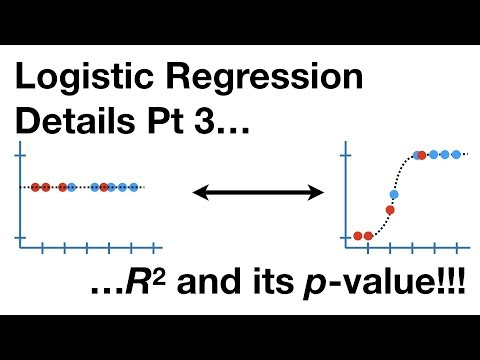

In [32]:
YT('xxFYro8QuXA', width=800, height=520)

In [1]:
# McFadden's R pseudo square
class McFaddens_R2():
    
    def __init__(self, X,y_test,y_pred_prob):
        self.X = X
        self.y_test = y_test
        self.y_pred_prob = y_pred_prob
        self.LL_fit, self.LL_mean = 0, 0
        self.log_likelihood_fit = []
        
    
    def fit(self):
        # calculating LL_fit
        for i in range(len(self.y_test)):
            if self.y_test[i]:
                temp = math.log(self.y_pred_prob[i])
                self.LL_fit += temp
            else:
                temp = math.log(1 - self.y_pred_prob[i])
                self.LL_fit += temp
            self.log_likelihood_fit.append(temp)
        
        # calculating LL_mean
        overall_probability = df.iloc[:, -1].values.tolist().count(1)/X.shape[0]
        for i in self.y_test:
            if i:
                self.LL_mean += math.log(overall_probability)
            else:
                self.LL_mean += math.log(1 - overall_probability)
        
        self.R2 = 1 - self.LL_fit / self.LL_mean
        return self.R2

###### Or we could just use the confusion matrix, which is more preferred with classification problems.

# CODE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import math

In [3]:
df = pd.read_csv('Social_Network_ads.csv')

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.shape

(400, 3)

In [6]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
# purchased v/s not purchased, absolute
n_P, n_not_P = df.Purchased.values.tolist().count(1), df.Purchased.values.tolist().count(0)
n_P, n_not_P

(143, 257)

[]

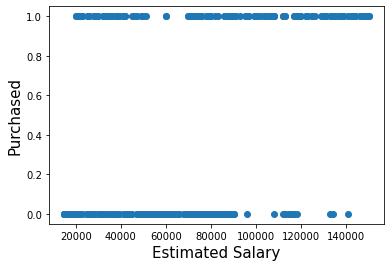

In [10]:
plt.scatter(df.EstimatedSalary, df.Purchased)
plt.xlabel('Estimated Salary', fontsize=15)
plt.ylabel('Purchased', fontsize=15)
plt.plot()

[]

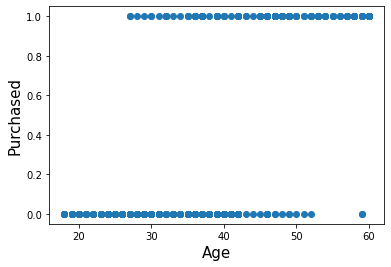

In [11]:
plt.scatter(df.Age, df.Purchased)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Purchased', fontsize=15)
plt.plot()

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


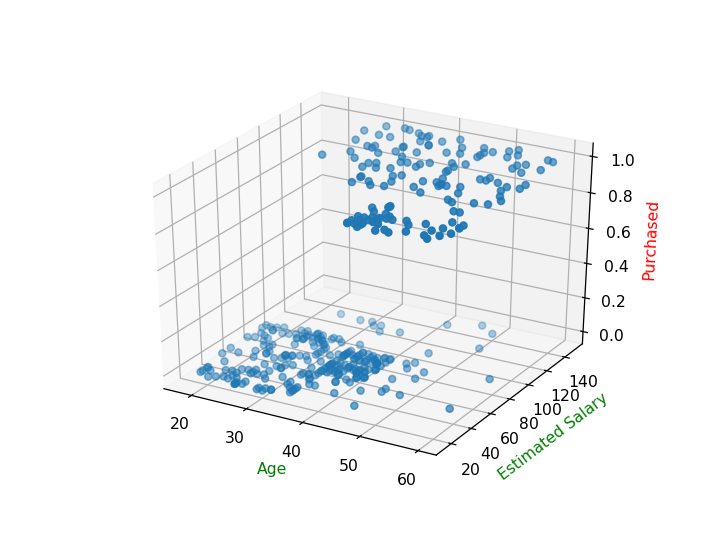

In [13]:
# 3D interactive scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df.Age, df.EstimatedSalary/1000, df.Purchased)
ax.set_xlabel('Age', c='green')
ax.set_ylabel('Estimated Salary',c='green')
ax.set_zlabel('Purchased', c='red')
plt.show()

In [14]:
df.EstimatedSalary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [15]:
lt_mean, mt_mean = 0, 0
for i,j in list(zip(df.EstimatedSalary, df.Purchased)):
    if i<=df.EstimatedSalary.mean() and j:
        lt_mean += 1
    elif i>df.EstimatedSalary.mean() and j:
        mt_mean += 1

lt_mean, mt_mean

(47, 96)

In [ ]:
# It was a little harder to tell just by looking at the scatter plot, but the above data tells us that higher salary is 
# indeed related to a higher chance of purchasing the product as 96 people who have a salary above the mean of the data and
# have purchased compared to just 47 people who purchased and had the salary below the mean.

## With just age

In [29]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
X = df.iloc[:, 0].values
y = df.iloc[:, -1].values

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.80, random_state=1)
# no need of feature scaling as scales do not vary significantly

In [21]:
# MODEL
log_reg = LogisticRegression()
log_reg.fit(X_train.reshape(len(X_train),1), Y_train)

LogisticRegression()

In [22]:
log_reg.intercept_[0], log_reg.coef_[0][0]

(-7.82184517344208, 0.1838886695327178)

In [23]:
# PREDICTIONS
y_pred = log_reg.predict(X_test.reshape(len(X_test),1))

y_pred_probs = log_reg.predict_proba(X_test.reshape(len(X_test),1))

y_pred_log_probs = log_reg.predict_log_proba(X_test.reshape(len(X_test),1))

In [24]:
# just sorting the predictions for plotting purposes
zipped = list(zip(X_test,y_pred_probs[:, -1]))
zipped.sort()
unzip = list(zip(*zipped))

<IPython.core.display.Javascript object>


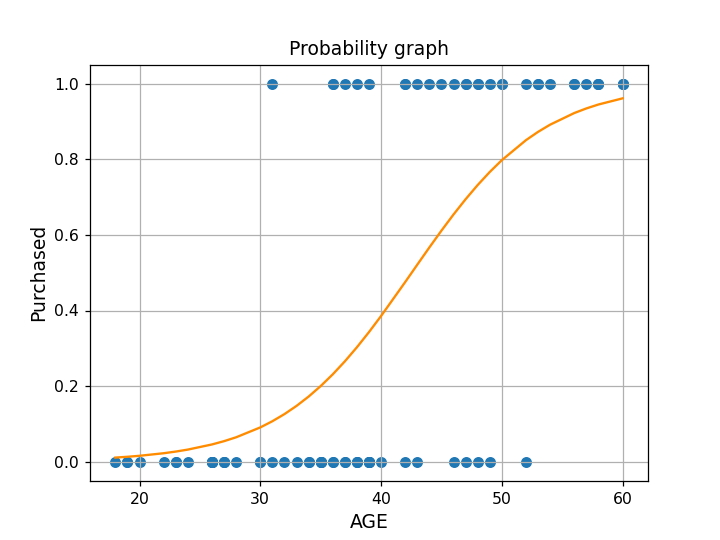

In [25]:
plt.scatter(X_test,Y_test)
plt.plot(unzip[0], unzip[1], c='#ff8c00')
plt.xlabel('AGE', size=12)
plt.ylabel('Purchased', size=12)
plt.title('Probability graph')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


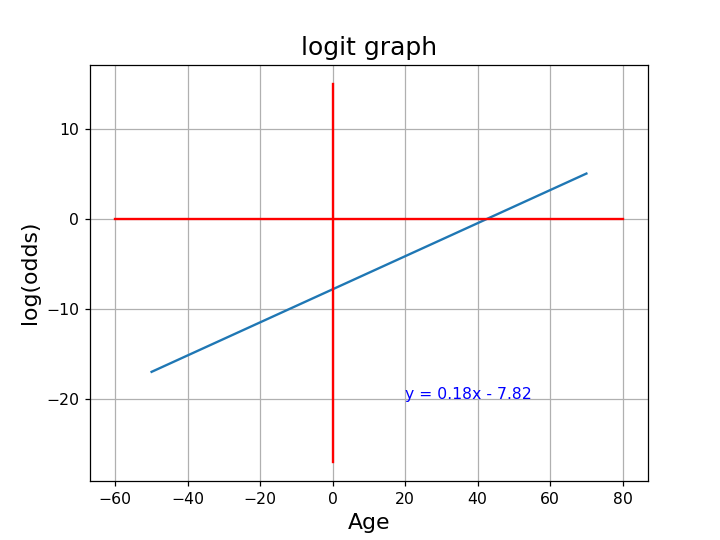

In [26]:
x_ = np.linspace(-50,70,120)
log_odds_x = log_reg.coef_[0][0]*x_ + log_reg.intercept_[0]
# graph
plt.plot(x_, log_odds_x)
plt.plot([0,0],[min(log_odds_x)-10, max(log_odds_x)+10], c='red')
plt.plot([min(x_)-10, max(x_)+10],[0,0], c='red')
plt.annotate(s='y = 0.18x - 7.82', xy=(20,-20), c='blue')
plt.xlabel('Age',size=14)
plt.ylabel('log(odds)', size=14)
plt.title('logit graph', size=16)
plt.grid()
plt.show()

In [25]:
# For 1 year increase in age, the log(odds) of purchasing the item increases by a factor of 0.18.

In [27]:
mcF_r2 = McFaddens_R2(X, Y_test, y_pred_probs[:, 1])
mcF_r2.fit()

0.42515674197802444

In [28]:
log_reg.score(X_test.reshape(len(X_test),1), Y_test)

0.825

In [57]:
# manual check of log_reg.score()
acc = y_pred == Y_test
true = 0
for i in acc:
    if i==True:
        true+=1

true / len(acc)

0.825

#### Veryifying that $\log(\frac{p}{1-p})$ does indeed equal to $\beta_0 + \beta_1X$ :

In [28]:
beta_0 = log_reg.intercept_
beta_1 = log_reg.coef_[0][0]
log_odds = beta_0 + beta_1 * X_test

In [29]:
# log(odds) value for X_test
y_pred_log_odds = [math.log(x/(1-x)) for x in y_pred_probs[:,1]]

In [30]:
log_odds[:5]

array([-1.20185307, -0.65018706, -1.20185307, -0.65018706, -3.04073977])

In [31]:
y_pred_log_odds[:5]

[-1.2018530702642396,
 -0.6501870616660865,
 -1.2018530702642396,
 -0.6501870616660865,
 -3.0407397655914172]

In [32]:
# YES IT DOES!!! COOL! LET'S MOVE ON

## With just Salary

In [25]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:, 1].values
y = df.iloc[:, -1].values

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.80, random_state=1)
# feature scaling needed

In [57]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train.reshape(len(X_train),1))
X_test = SC.transform(X_test.reshape(len(X_test),1))

In [59]:
# MODEL
log_reg = LogisticRegression()
log_reg.fit(X_train.reshape(len(X_train),1), Y_train)

LogisticRegression()

In [60]:
log_reg.intercept_[0], log_reg.coef_[0][0]

(-0.7125639750060138, 0.8428590838585093)

In [61]:
# PREDICTIONS
y_pred = log_reg.predict(X_test.reshape(len(X_test),1))

y_pred_probs = log_reg.predict_proba(X_test.reshape(len(X_test),1))

y_pred_log_probs = log_reg.predict_log_proba(X_test.reshape(len(X_test),1))

In [62]:
y_pred_probs[:, 1]

array([0.16910211, 0.29022167, 0.62855041, 0.6515079 , 0.62855041,
       0.31117394, 0.17986668, 0.45100493, 0.12284394, 0.75009348,
       0.34973309, 0.35542088, 0.34973309, 0.70055321, 0.40829088,
       0.71090204, 0.41432421, 0.27506773, 0.43869829, 0.53178691,
       0.3669185 , 0.44484316, 0.74063574, 0.20704557, 0.14598707,
       0.11501345, 0.22388713, 0.3611498 , 0.17263214, 0.60499747,
       0.20298449, 0.37272557, 0.43257217, 0.3611498 , 0.42038336,
       0.3963084 , 0.12284394, 0.43257217, 0.12831559, 0.14290777,
       0.76384276, 0.52557805, 0.61093636, 0.31653989, 0.28511575,
       0.62855041, 0.17622023, 0.59902744, 0.39036255, 0.18733576,
       0.27506773, 0.25093167, 0.3963084 , 0.15231055, 0.35542088,
       0.29538126, 0.20298449, 0.24627714, 0.48822598, 0.68999547,
       0.45100493, 0.40829088, 0.59302786, 0.23714382, 0.51313851,
       0.76384276, 0.17622023, 0.33848607, 0.71090204, 0.23714382,
       0.49445346, 0.21116637, 0.59902744, 0.34408774, 0.24627

In [63]:
y_pred_probs[:, 1].max()
# The maximum probability of a person buying the product based on his salary is just 0.76. It implies to some extent that 
# Salary is not that good an indicator for the response variable.

0.7638427581457371

In [64]:
# just sorting the predictions for plotting purposes
zipped = list(zip(X_test,y_pred_probs[:, 1]))
zipped.sort()
unzip = list(zip(*zipped))

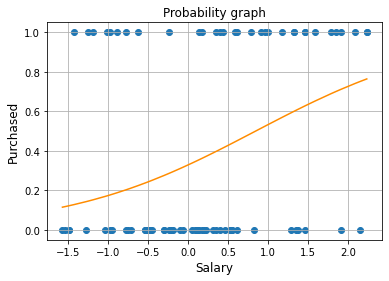

In [65]:
plt.scatter(X_test,Y_test)
plt.plot(unzip[0], unzip[1], c='#ff8c00')
plt.xlabel('Salary', size=12)
plt.ylabel('Purchased', size=12)
plt.title('Probability graph')
plt.grid()
plt.show()

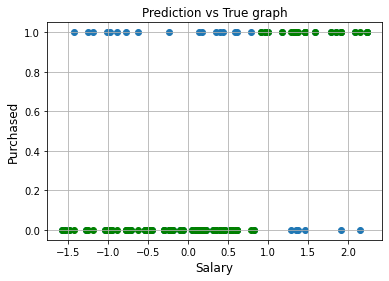

In [66]:
plt.scatter(X_test,Y_test)
plt.scatter(X_test, y_pred, c='green')
plt.xlabel('Salary', size=12)
plt.ylabel('Purchased', size=12)
plt.title('Prediction vs True graph')
plt.grid()
plt.show()

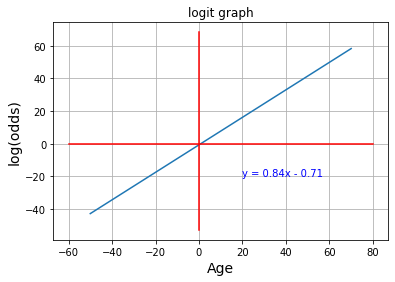

In [68]:
x_ = np.linspace(-50,70,120)
log_odds_x = log_reg.coef_[0][0]*x_ + log_reg.intercept_[0]
# graph
plt.plot(x_, log_odds_x)
plt.plot([0,0],[min(log_odds_x)-10, max(log_odds_x)+10], c='red')
plt.plot([min(x_)-10, max(x_)+10],[0,0], c='red')
plt.annotate(s='y = 0.84x - 0.71', xy=(20,-20), c='blue')
plt.xlabel('Age',size=14)
plt.ylabel('log(odds)', size=14)
plt.title('logit graph')
plt.grid()
plt.show()

In [69]:
log_reg.score(X_test.reshape(len(X_test),1), Y_test)

0.7125

In [72]:
# McFadden's R_squared :
mcF_r22 = McFaddens_R2(X, Y_test, y_pred_probs[:,1])
mcF_r22.fit()
# not that great

0.06154294889866718

### With both age and salary

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.80, random_state=7)

In [30]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [31]:
# MODEL
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [32]:
# PREDICTIONS
y_pred = log_reg.predict(X_test)

y_pred_probs = log_reg.predict_proba(X_test)

y_pred_log_probs = log_reg.predict_log_proba(X_test)

In [33]:
y_pred_probs[:, 1]

array([0.76687511, 0.01605695, 0.24646052, 0.12573085, 0.57296408,
       0.49223019, 0.96770353, 0.25985749, 0.98168084, 0.12732104,
       0.00948218, 0.82156541, 0.01606544, 0.90331543, 0.51566888,
       0.93490734, 0.30277912, 0.06852461, 0.52511118, 0.78340172,
       0.09326454, 0.03660367, 0.47692654, 0.35381699, 0.10287253,
       0.1803433 , 0.80706707, 0.09285973, 0.16815702, 0.2260865 ,
       0.40020334, 0.01055393, 0.22441249, 0.44977006, 0.00847791,
       0.88968665, 0.00303032, 0.96829778, 0.73976544, 0.10465665,
       0.05468693, 0.00604934, 0.10465665, 0.35589012, 0.3667097 ,
       0.74242324, 0.05465918, 0.32095716, 0.02670361, 0.07450093,
       0.0282115 , 0.54869042, 0.51313863, 0.36017628, 0.8820944 ,
       0.76697108, 0.9675533 , 0.56604044, 0.07549914, 0.10243072,
       0.04737059, 0.72695198, 0.30075794, 0.94115856, 0.02271813,
       0.18176561, 0.34617919, 0.75838777, 0.4427915 , 0.8249764 ,
       0.92035855, 0.0434684 , 0.02335366, 0.67954386, 0.32095

In [34]:
y_pred_probs[:, 1].max()

0.9816808370322907

In [35]:
log_reg.score(X_test, Y_test)

0.875

In [36]:
mcF_r2 = McFaddens_R2(X, Y_test, y_pred_probs[:, 1])
mcF_r2.fit()
# 0.47 That's pretty awesome

0.4787874903135785

In [62]:
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [41]:
Image('CAPTURE2.PNG',width=400, height=300, embed=True)
# Eg:

NameError: name 'Image' is not defined

In [12]:
confusion_matrix(Y_test, y_pred)

array([[53,  0],
       [27,  0]], dtype=int64)